In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # graficos
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from utils import (
    plot_correlation_circle,
    plot_individuals,
    biplot,
    MyPCA as PCA
)

pd.options.display.max_columns=None

In [2]:
data_name = "CYCLONES"
# data_name = "SARMIENTO"
pierna = "DER"

In [3]:
df = pd.read_csv(f"../datos/{data_name}_PIERNA_{pierna}.csv", sep="|")
print(df.shape)
df.head(3)

(6363, 23)


,item,player,replica,angulos_rod_der_x,angulos_rod_der_y,angulos_rod_der_z,momentos_rod_der_x,momentos_rod_der_y,momentos_rod_der_z,emg_der_bf,emg_der_st,emg_der_vl,emg_der_vm,hq_der_lat,hq_der_med,frv_der_frv,velocidad_der_vel,talla_m,peso_kg,posicion_de_juego,pierna_habil,lesion_rodilla_ultimos_3_anos,tipo_de_lesion
0,1,JEFFERSON ANGULO,1,48.321899,-4.337573,-8.497101,-0.071115,-0.005196,0.056340,0.153899,0.281727,0.232937,0.494979,0.660687,0.569170,4.023742,3.112761,1.75,72.45,defensa lateral,derecha,no,no
1,1,JEFFERSON ANGULO,2,36.976704,-4.768758,-6.886652,0.055122,-0.013010,0.017787,0.282068,0.293743,0.230157,0.392641,1.225543,0.748122,4.190571,3.056547,1.75,72.45,defensa lateral,derecha,no,no
2,1,JEFFERSON ANGULO,3,53.867855,7.628788,-21.518278,0.060003,-0.011600,0.051897,0.471769,0.244241,0.071327,0.380602,6.614168,0.641722,4.518857,2.899150,1.75,72.45,defensa lateral,derecha,no,no


In [4]:
vars_use = [
    f"emg_{pierna.lower()}_bf",
    f"emg_{pierna.lower()}_st",
    f"emg_{pierna.lower()}_vl",
    f"emg_{pierna.lower()}_vm",
    f"hq_{pierna.lower()}_lat",
    f"hq_{pierna.lower()}_med",
    f"angulos_rod_{pierna.lower()}_x",
    f"angulos_rod_{pierna.lower()}_y",
    f"velocidad_{pierna.lower()}_vel",
    f"momentos_rod_{pierna.lower()}_x",
    f"momentos_rod_{pierna.lower()}_y",
    f"frv_{pierna.lower()}_frv"
]

# vars_use = [
#     # 'angulos_rod_der_y', 
#     'momentos_rod_der_x', 
#     'hq_der_lat', 
#     'emg_der_bf',
#     # 'momentos_rod_der_y', 
#     'velocidad_der_vel', 'frv_der_frv'
# ]

### Situaciones

In [5]:
situaciones = {
    ## Situacion 1: Maximo momento abductor
    "sit1": {"var_interes": "momentos_rod_"+pierna.lower()+"_y", "min": False},
    "sit2": {"var_interes": "velocidad_"+pierna.lower()+"_vel", "min": True},
    "sit3": {"var_interes": "frv_"+pierna.lower()+"_frv", "min": False},
}

sitid = "sit2"
var_interes = situaciones[sitid]["var_interes"]
get_min = situaciones[sitid]["min"]

print(var_interes, get_min)

df_sit = (
    df
    # ordenamos de mayor a menor los datos de cada jugador en cada replica
    .sort_values(["player", "replica", var_interes], ascending=get_min)
    # capturamos el maximo o minimo
    .groupby(["player", "replica"])
    .first()
)
print(df_sit.shape)
df_sit.head(3)

velocidad_der_vel True
(63, 21)


item  angulos_rod_der_x  angulos_rod_der_y  \
player       replica                                               
DAIRO BUSTOS 1          60          53.155598          -2.672925   
             2          42          61.888020           2.325140   
             3          41          54.430668           0.505015   

                      angulos_rod_der_z  momentos_rod_der_x  \
player       replica                                          
DAIRO BUSTOS 1                 4.992381            0.271022   
             2                 6.950686            0.266855   
             3                13.970980            0.276795   

                      momentos_rod_der_y  momentos_rod_der_z  emg_der_bf  \
player       replica                                                       
DAIRO BUSTOS 1                 -0.039295            0.036369    0.239700   
             2                  0.072869           -0.021180    0.706295   
             3                  0.072123           -0.007455    0.278003   

                      emg_der_st  emg_der_vl  emg_der_vm  hq_der_lat  \
player       replica                                                   
DAIRO BUSTOS 1          0.153313    0.008408    0.099774   28.506882   
             2          0.019476    0.198050    0.456292    3.566253   
             3          0.078902    0.211186    0.270146    1.316384   

                      hq_der_med  frv_der_frv  velocidad_der_vel  talla_m  \
player       replica                                                        
DAIRO BUSTOS 1          1.536597    19.301424           2.573492     1.75   
             2          0.042683    16.843241           2.065858     1.75   
             3          0.292072    16.964485           2.468009     1.75   

                      peso_kg posicion_de_juego pierna_habil  \
player       replica                                           
DAIRO BUSTOS 1           65.0   defensa central    izquierda   
             2           65.0   defensa central    izquierda   
             3           65.0   defensa central    izquierda   

                     lesion_rodilla_ultimos_3_anos tipo_de_lesion  
player       replica                                               
DAIRO BUSTOS 1                                  no             no  
             2                                  no             no  
             3                                  no             no

### Analisis Descriptivo

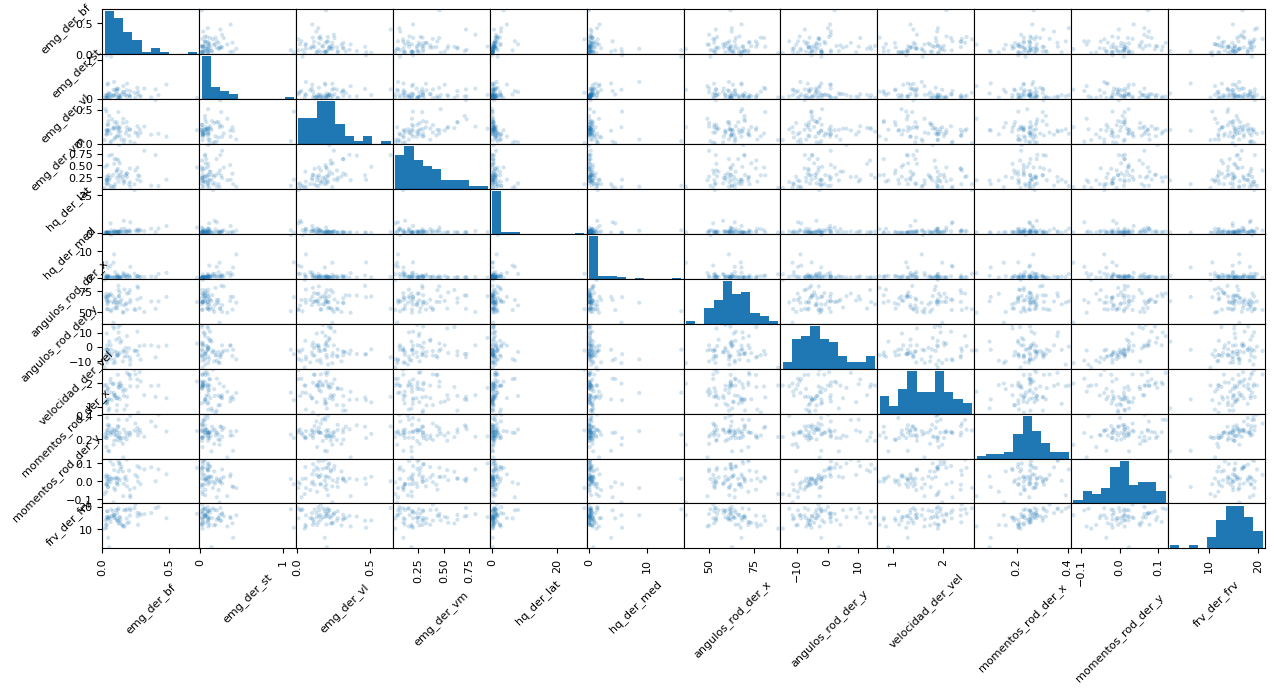

In [6]:
_ = pd.plotting.scatter_matrix(
    df_sit.reset_index(drop=True)[vars_use], 
    alpha=0.2, 
    figsize=(15, 7)
)

for ax in _.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation = 45)
plt.show()

In [7]:
corr = df_sit[vars_use].corr(method="spearman")

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.diag_indices_from(mask)] = True
corr[mask] = np.nan
(
    corr
    .style
    .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
    .highlight_null(color='#f1f1f1')  # Color NaNs grey
    .format(precision=2)
)

,emg_der_bf,emg_der_st,emg_der_vl,emg_der_vm,hq_der_lat,hq_der_med,angulos_rod_der_x,angulos_rod_der_y,velocidad_der_vel,momentos_rod_der_x,momentos_rod_der_y,frv_der_frv
emg_der_bf,nan,0.10,-0.15,0.10,0.79,0.03,-0.08,0.12,0.38,0.23,0.26,0.37
emg_der_st,0.10,nan,0.03,-0.07,0.13,0.78,-0.24,-0.18,-0.39,-0.26,-0.26,-0.12
emg_der_vl,-0.15,0.03,nan,0.57,-0.66,-0.32,-0.05,0.03,-0.35,-0.04,0.06,-0.13
emg_der_vm,0.10,-0.07,0.57,nan,-0.25,-0.65,0.11,0.29,-0.25,0.02,0.37,0.00
hq_der_lat,0.79,0.13,-0.66,-0.25,nan,0.27,-0.12,0.05,0.47,0.15,0.14,0.35
hq_der_med,0.03,0.78,-0.32,-0.65,0.27,nan,-0.21,-0.34,-0.14,-0.19,-0.42,-0.11
angulos_rod_der_x,-0.08,-0.24,-0.05,0.11,-0.12,-0.21,nan,0.05,-0.08,0.07,0.12,-0.35
angulos_rod_der_y,0.12,-0.18,0.03,0.29,0.05,-0.34,0.05,nan,0.09,0.02,0.81,0.17
velocidad_der_vel,0.38,-0.39,-0.35,-0.25,0.47,-0.14,-0.08,0.09,nan,0.20,0.16,0.40
momentos_rod_der_x,0.23,-0.26,-0.04,0.02,0.15,-0.19,0.07,0.02,0.20,nan,0.15,0.69


In [8]:
# Recategorizacion de la posicion de juego
def recode_pos_juego(x):
    if "def" in x:
        newx = "defensa"
    elif "ofen" in x:
        newx = "ofensiva"
    elif "delan" in x:
        newx = "ofensiva"
    elif "extr" in x:
        newx = "ofensiva"
    else:
        newx = x
    
    return newx

df_sit["pos_juego_recat"] = [
    recode_pos_juego(x) for x in df_sit["posicion_de_juego"]
]

In [9]:
df_sit.head(2)

item  angulos_rod_der_x  angulos_rod_der_y  \
player       replica                                               
DAIRO BUSTOS 1          60          53.155598          -2.672925   
             2          42          61.888020           2.325140   

                      angulos_rod_der_z  momentos_rod_der_x  \
player       replica                                          
DAIRO BUSTOS 1                 4.992381            0.271022   
             2                 6.950686            0.266855   

                      momentos_rod_der_y  momentos_rod_der_z  emg_der_bf  \
player       replica                                                       
DAIRO BUSTOS 1                 -0.039295            0.036369    0.239700   
             2                  0.072869           -0.021180    0.706295   

                      emg_der_st  emg_der_vl  emg_der_vm  hq_der_lat  \
player       replica                                                   
DAIRO BUSTOS 1          0.153313    0.008408    0.099774   28.506882   
             2          0.019476    0.198050    0.456292    3.566253   

                      hq_der_med  frv_der_frv  velocidad_der_vel  talla_m  \
player       replica                                                        
DAIRO BUSTOS 1          1.536597    19.301424           2.573492     1.75   
             2          0.042683    16.843241           2.065858     1.75   

                      peso_kg posicion_de_juego pierna_habil  \
player       replica                                           
DAIRO BUSTOS 1           65.0   defensa central    izquierda   
             2           65.0   defensa central    izquierda   

                     lesion_rodilla_ultimos_3_anos tipo_de_lesion  \
player       replica                                                
DAIRO BUSTOS 1                                  no             no   
             2                                  no             no   

                     pos_juego_recat  
player       replica                  
DAIRO BUSTOS 1               defensa  
             2               defensa

### PCA

In [10]:
X = df_sit[vars_use].values.copy()
Xstd = StandardScaler().fit_transform(X)

In [11]:
# pca = PCA(n_components=2)
# Xpca = pca.fit_transform(Xstd)
# print( np.cumsum(pca.explained_variance_ratio_) )

# plot_correlation_circle(X, Xpca, vars_use)
# plot_individuals(Xpca, color)

In [12]:
my_pca = PCA(n_components=2, method="spearman").fit(X)

# print('Components:\n', my_pca.components)
print('Explained variance ratio: ', my_pca.explained_variance_ratio)
print('Cumulative explained variance: ', my_pca.cum_explained_variance)

Explained variance ratio:  [0.2548652522897903, 0.24728406050325677]
Cumulative explained variance:  [0.25486525 0.50214931]


In [13]:
Xpca = my_pca.transform(X)
print('Transformed data shape from scratch:', Xpca.shape)

Transformed data shape from scratch: (63, 2)


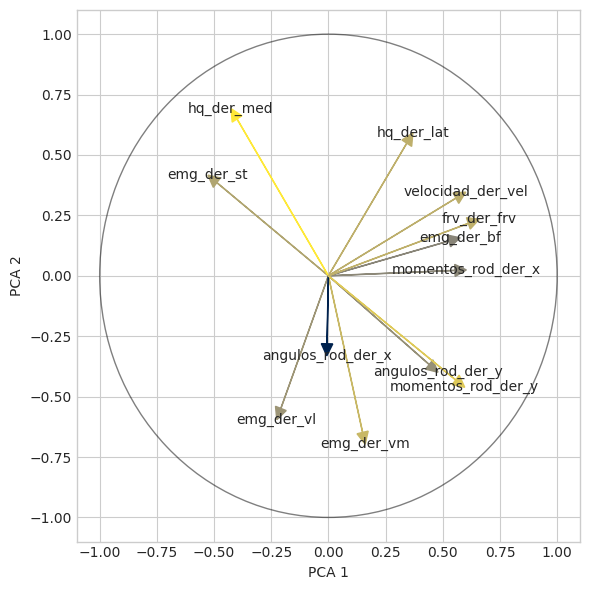

In [14]:
plot_correlation_circle(X, Xpca, vars_use)

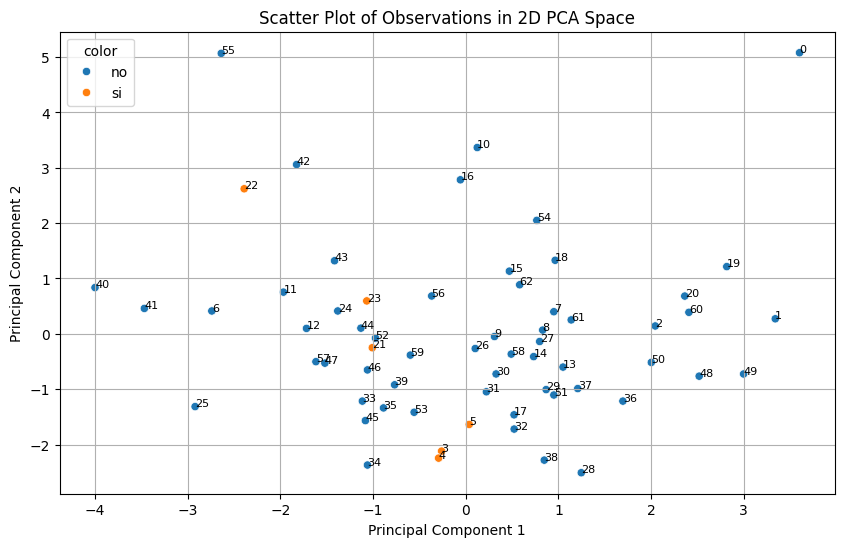

In [15]:
color_var = "lesion_rodilla_ultimos_3_anos"
# color_var = "pos_juego_recat"
color_arr = df_sit[color_var].values
plot_individuals(Xpca, color_arr)

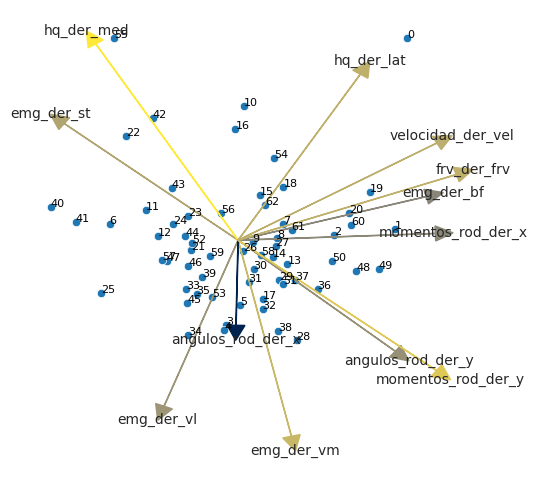

In [17]:
biplot(X, Xpca, vars_use)

Index(['angulos_rod_der_y', 'momentos_rod_der_x', 'hq_der_lat', 'emg_der_bf',
       'momentos_rod_der_y', 'velocidad_der_vel', 'frv_der_frv'],
      dtype='object')


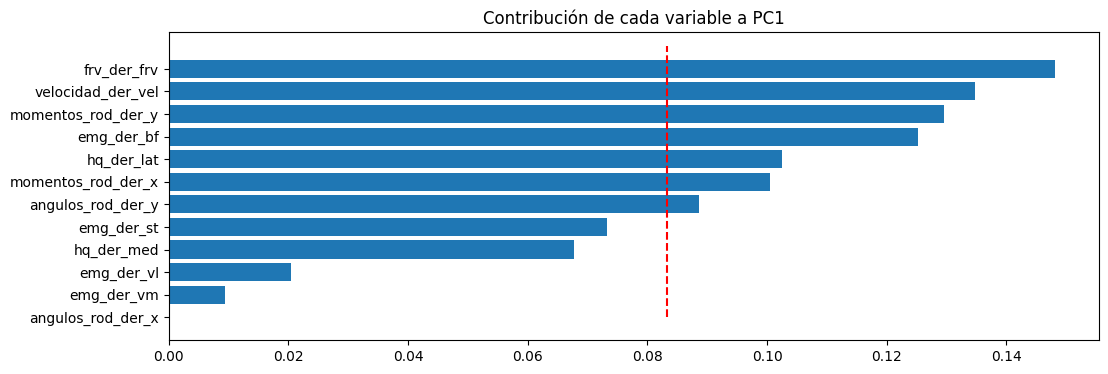

Index(['emg_der_vl', 'hq_der_lat', 'emg_der_vm', 'hq_der_med'], dtype='object')


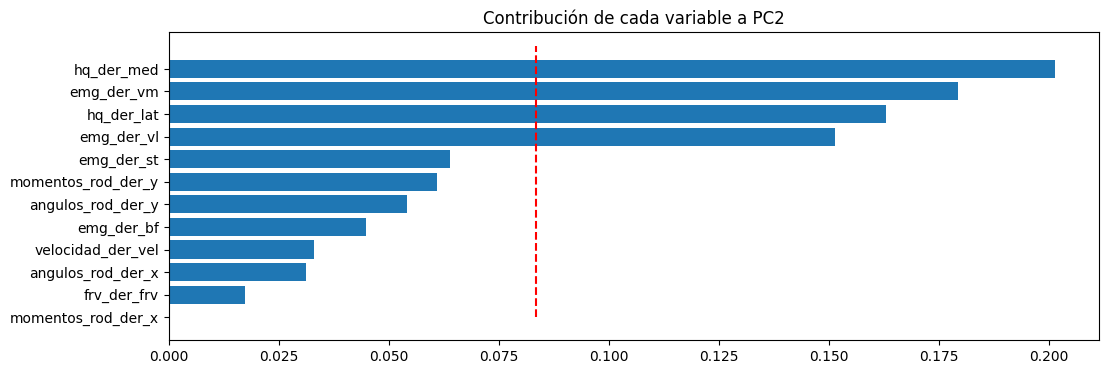

In [18]:
# u (vector propio) -> components: https://pca4ds.github.io/formulas-for-pca.html
# contribuciones de las variables a las componentes
thr = 1./len(vars_use)
contrib = pd.DataFrame(my_pca.components**2, columns=vars_use).T
for x in contrib.columns:
    contrib_plot = contrib.copy()
    contrib_plot = contrib_plot.sort_values([x])
    print(contrib_plot[contrib_plot[x]>thr].index)
    plt.figure(figsize=(12, 4))
    plt.barh(y=contrib_plot.index, width=contrib_plot[x])
    plt.vlines(
        x=thr, 
        ymin=0, 
        ymax=len(vars_use), 
        linestyles="dashed", 
        color="red"
    )
    plt.title(f"Contribución de cada variable a PC{x+1}")
    plt.show()

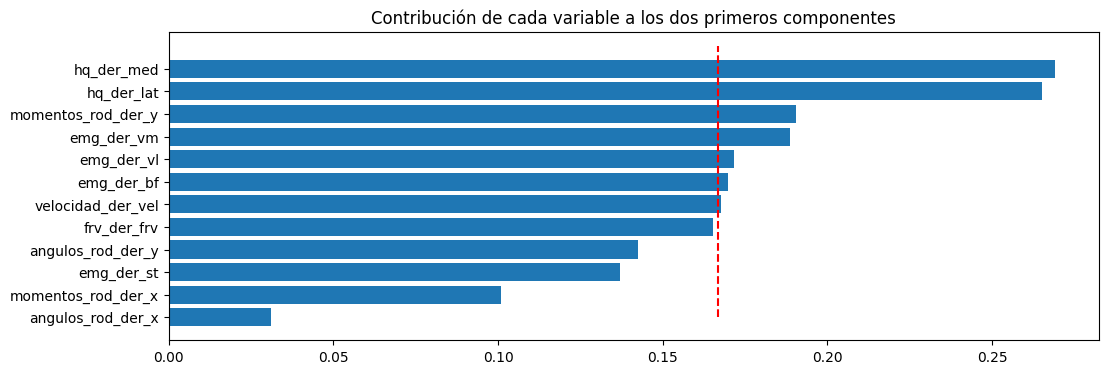

In [19]:
contrib_plot = contrib.sum(axis=1).copy()
contrib_plot = contrib_plot.sort_values()

plt.figure(figsize=(12, 4))
plt.barh(y=contrib_plot.index, width=contrib_plot)
plt.vlines(
    x=2./len(vars_use),
    ymin=0, 
    ymax=len(vars_use), 
    linestyles="dashed", 
    color="red"
)
plt.title(f"Contribución de cada variable a los dos primeros componentes")
plt.show()

In [20]:
my_pca.components

array([[ 0.35376488, -0.27069735, -0.14312434,  0.09695381,  0.32007258,
        -0.26028169, -0.00797392,  0.29757623,  0.36710157,  0.31702738,
         0.35994061,  0.38477703],
       [ 0.21170008,  0.25252784, -0.3889347 , -0.42337112,  0.40357131,
         0.44860907, -0.17627986, -0.23251353,  0.18176918,  0.01826855,
        -0.24694374,  0.13148175]])

### Clusters

In [43]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km = km.fit(Xpca)

In [44]:
df_cl = df_sit.copy()
df_cl["cluster"] = km.labels_

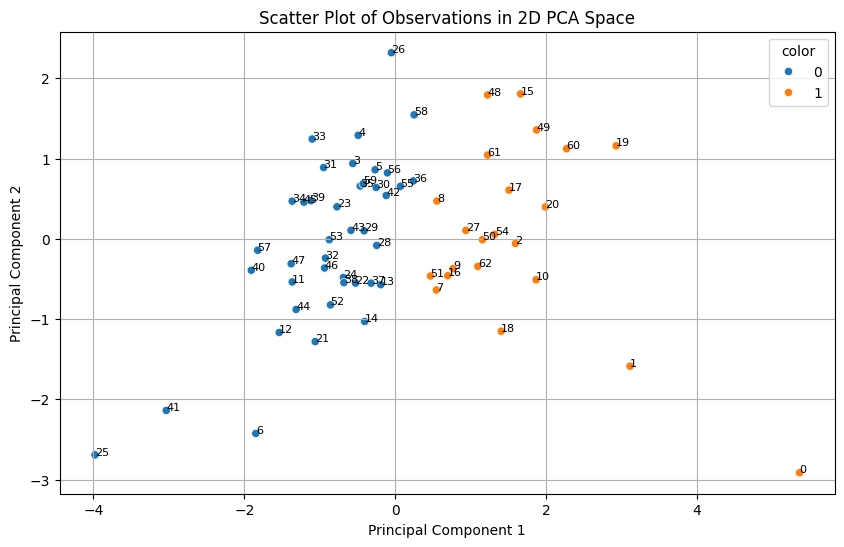

In [45]:
color_var = "cluster"
color_arr = df_cl[color_var].values
plot_individuals(Xpca, color_arr)

In [46]:
agg_dict = {x: ["min", "median", "mean", "max"] for x in vars_use}
df_cl.groupby(["cluster"]).agg(agg_dict).T

cluster                            0          1
momentos_rod_der_x min      0.043289   0.217878
                   median   0.228484   0.273908
                   mean     0.225912   0.291949
                   max      0.376710   0.404422
hq_der_lat         min      0.045352   0.620074
                   median   0.366447   1.616389
                   mean     0.609240   3.660915
                   max      2.747343  28.506882
emg_der_bf         min      0.016256   0.060822
                   median   0.087227   0.243027
                   mean     0.090057   0.267557
                   max      0.266670   0.706295
velocidad_der_vel  min      0.743870   1.356665
                   median   1.417300   2.067835
                   mean     1.450448   2.020832
                   max      2.030356   2.573492
frv_der_frv        min      1.941961  13.018306
                   median  14.338251  17.806964
                   mean    13.912948  17.557528
                   max     18.825612  20.977696

---